### Project Scenario
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?
2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 
- Task 1: Familiarize yourself with the dataset 
- Task 2: Generate basic statistics and visualizations for upper management. 
- Task 3: Use the appropriate tests to answer the questions provided.
- Task 4: Share your Jupyter Notebook.

The following describes the dataset variables:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:
- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

For each of the following questions:
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate Descriptive Statistics and Visualizations
- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

1. Boxplot for "Median value of owner-occupied homes" (MEDV)

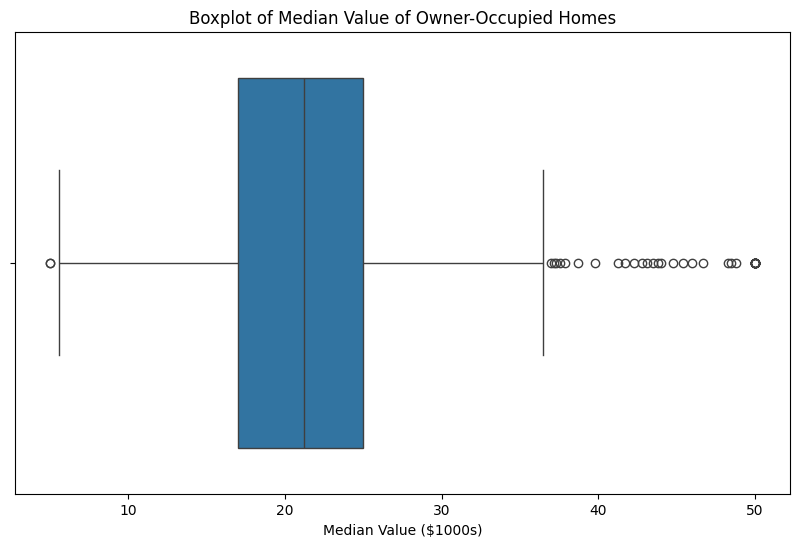

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value ($1000s)')
plt.show()

Findings: This boxplot shows the distribution of median home values. It displays the median, quartiles, and potential outliers. The box represents the interquartile range (IQR), with the median line inside. Whiskers extend to show the rest of the distribution, and points beyond the whiskers are potential outliers.

2. Bar plot for the Charles River variable (CHAS)

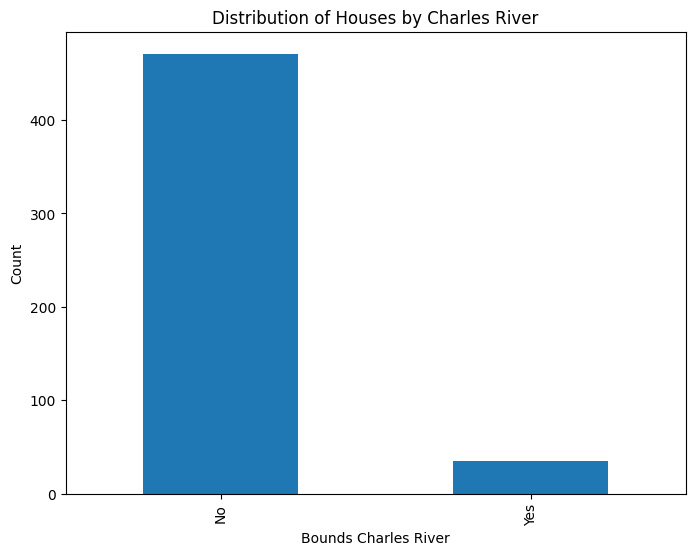

In [18]:

plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Distribution of Houses by Charles River')
plt.xlabel('Bounds Charles River')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Findings: This bar plot shows the count of houses that are bounded by the Charles River (1) versus those that are not (0). It gives a clear visual representation of the proportion of houses near the river compared to those that are not.

3. Boxplot for MEDV vs AGE (discretized)

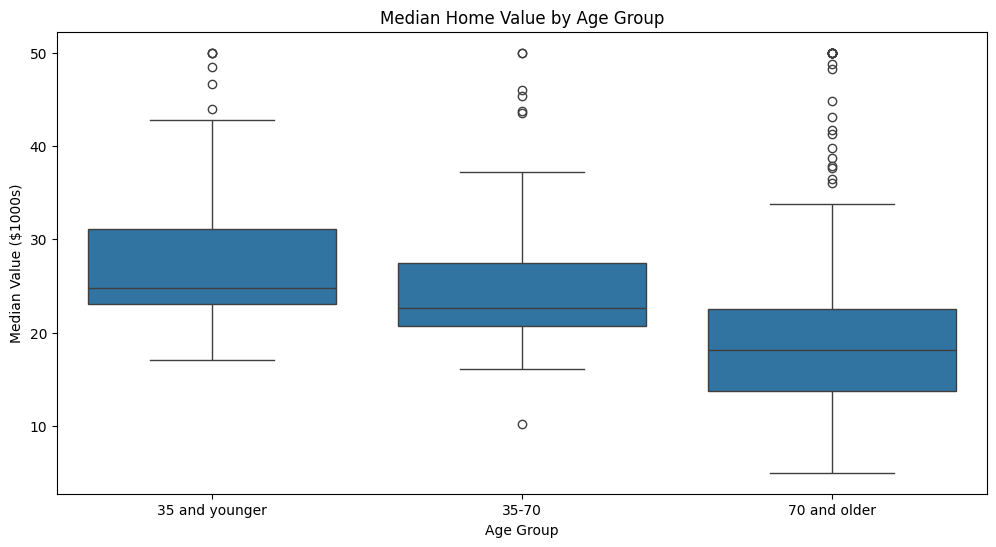

In [19]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['35 and younger', '35-70', '70 and older'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Median Home Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()


Findings: This boxplot compares the distribution of median home values across different age groups of houses. It allows us to see if there are significant differences in home values based on the age of the property.

4. Scatter plot for Nitric oxide concentrations vs non-retail business acres

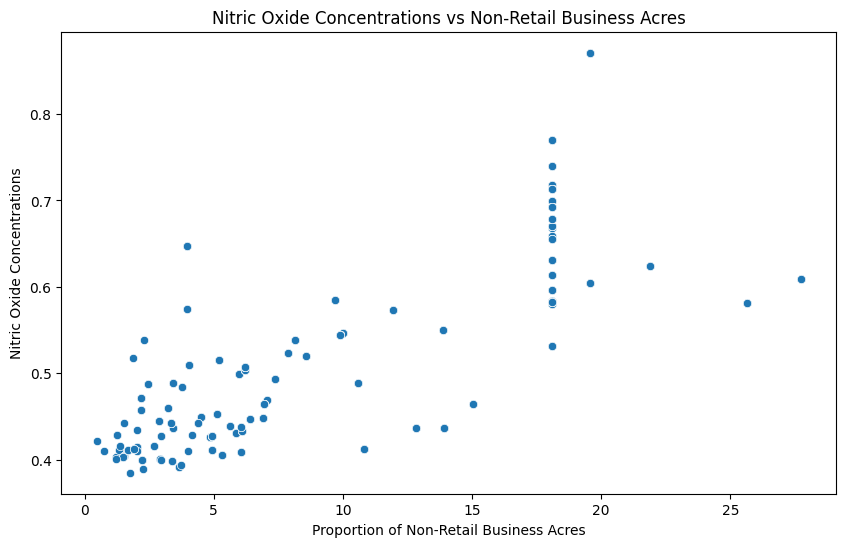

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentrations')
plt.show()


Findings: This scatter plot shows the relationship between nitric oxide concentrations and the proportion of non-retail business acres. If there's a positive correlation, we'd see the points trending upward from left to right. A negative correlation would show a downward trend. No clear pattern would suggest little to no relationship. 

There's a positive correlation.

5. Histogram for pupil-teacher ratio

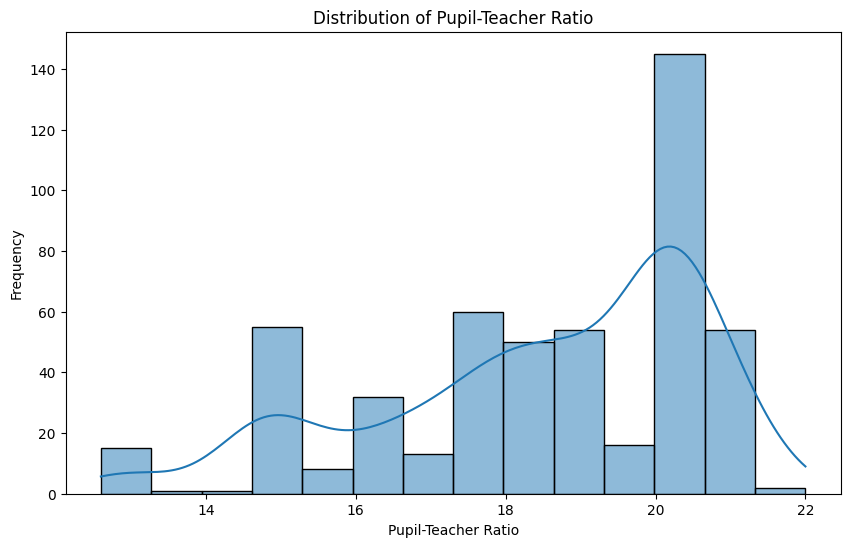

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


Findings: This histogram shows the distribution of pupil-teacher ratios across the dataset. It allows us to see the most common ratios, any peaks in the distribution, and whether the distribution is symmetric or skewed.

The distribution is skewed. The most common ratio is 20.

### Task 3 of question 1
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

## Hypothesis
- Null Hypothesis (𝐻0): There is no significant difference in the median value of houses bounded by the Charles River and those that are not (𝜇1=𝜇2).
- Alternative Hypothesis (𝐻𝐴): There is a significant difference in the median value of houses bounded by the Charles River and those that are not (𝜇1≠𝜇2).

      count       mean        std   min   25%   50%    75%   max
CHAS                                                            
0.0   471.0  22.093843   8.831362   5.0  16.6  20.9  24.80  50.0
1.0    35.0  28.440000  11.816643  13.4  21.1  23.3  33.15  50.0


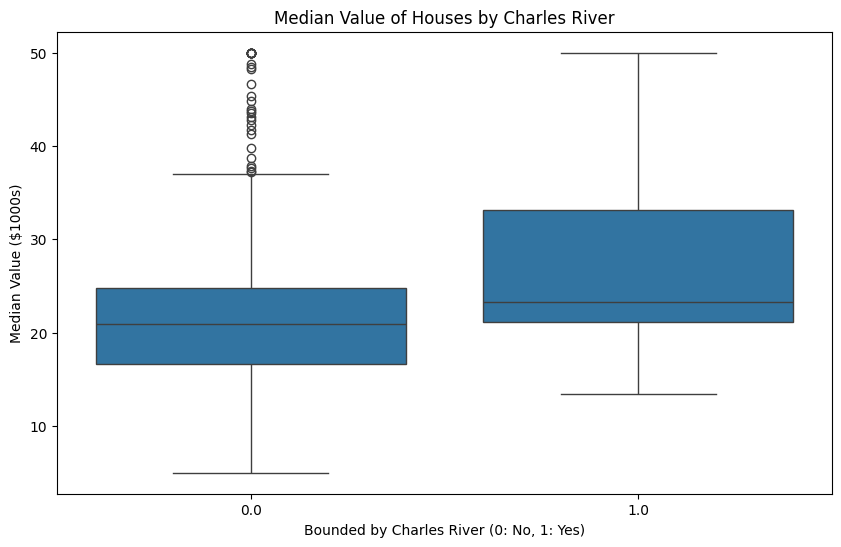

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming boston_df is already loaded as a pandas DataFrame

# Summary statistics
summary_stats = boston_df.groupby('CHAS')['MEDV'].describe()
print(summary_stats)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title('Median Value of Houses by Charles River')
plt.xlabel('Bounded by Charles River (0: No, 1: Yes)')
plt.ylabel('Median Value ($1000s)')
plt.show()


Explanation of statistics:
- The summary statistics show the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values of MEDV for houses bounded (CHAS=1) and not bounded (CHAS=0) by the Charles River.
- The boxplot visually represents the distribution of median house values for both groups, showing the median, quartiles, and potential outliers.

To determine if there's a significant difference in the median value of houses bounded by the Charles River or not, we'll use an independent samples T-test. 
This test is appropriate because:
1. We're comparing two independent groups (bounded and not bounded by the river).
2. The dependent variable (MEDV) is continuous.
3. We assume the data is approximately normally distributed.

In [12]:
from scipy import stats

# Extracting the MEDV values for the two groups
river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test for independent samples
t_statistic, p_value = stats.ttest_ind(river_bounded, not_river_bounded, equal_var=False)

print(f"T-test results:")
print(f"T-statistic: {t_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River and those that are not.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in the median value of houses based on Charles River proximity.")


T-test results:
T-statistic: 3.113291312794837
p-value: 0.0035671700981375174
Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River and those that are not.


Interpretation of results:
1. T-statistic: This value indicates the ratio of the difference between the group means to the variability of the groups. A larger absolute value suggests a greater difference between the groups.
2. p-value: If the p-value is less than the chosen significance level (typically 0.05), we reject the null hypothesis. This would indicate a statistically significant difference in the median value of houses bounded by the Charles River compared to those that are not.
3. Conclusion: Based on the p-value, we either reject or fail to reject the null hypothesis, providing evidence for or against a significant difference in median house values based on Charles River proximity.
These analyses provide insights into whether the proximity to the Charles River significantly affects the median value of houses in the Boston area. The boxplot and T-test results help identify if there are significant differences in home values between the two groups.

### Task 3 of question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis
- Null Hypothesis (H₀): There is no significant difference in the median values of houses (MEDV) among different proportions of owner-occupied units built prior to 1940 (AGE).
- Alternative Hypothesis (H₁): There is a significant difference in the median values of houses (MEDV) for at least one proportion of owner-occupied units built prior to 1940 (AGE).

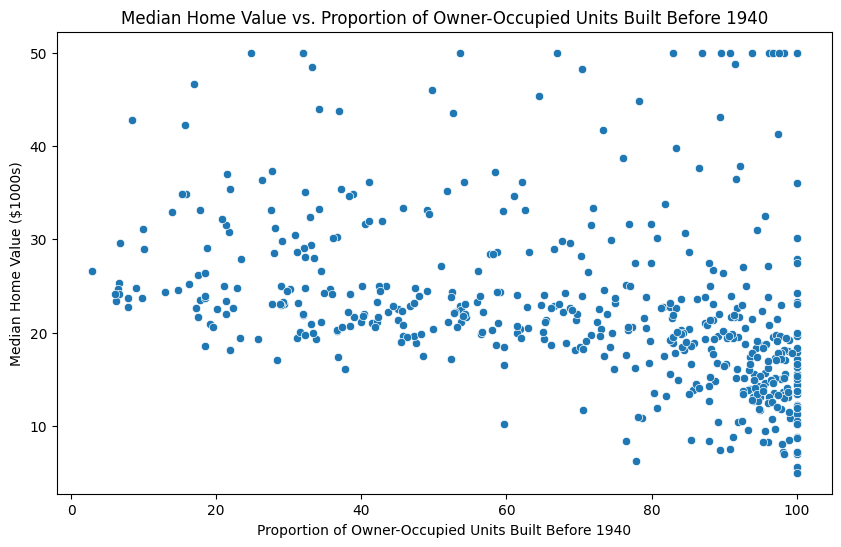

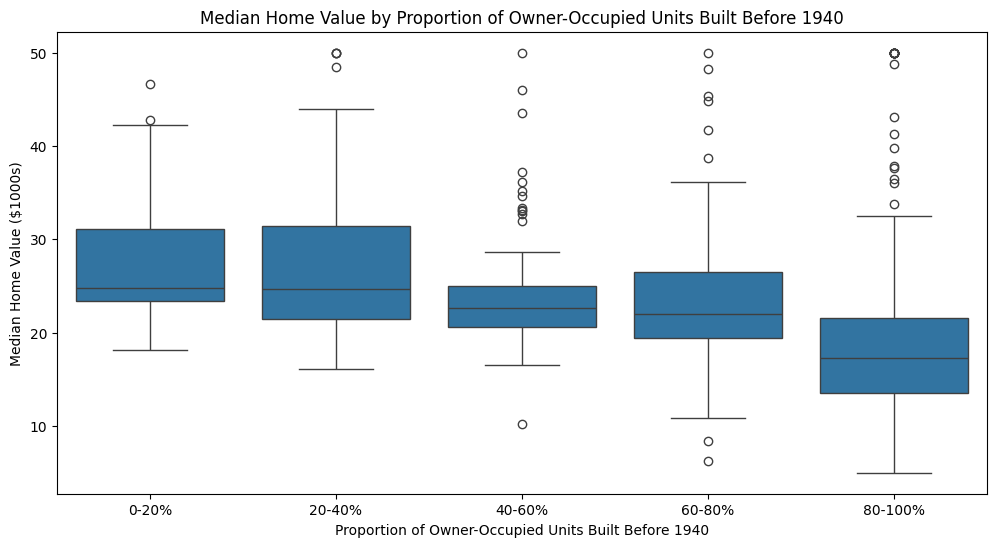

Correlation coefficient between AGE and MEDV: -0.38
         count       mean       std   min    25%   50%    75%   max
AGE_bin                                                            
0-20%     45.0  27.391111  6.418291  18.2  23.40  24.8  31.10  46.7
20-40%    71.0  27.421127  8.174558  16.1  21.45  24.7  31.40  50.0
40-60%    70.0  24.620000  6.861711  10.2  20.65  22.7  25.00  50.0
60-80%    81.0  23.670370  8.140553   6.3  19.40  22.0  26.50  50.0
80-100%  239.0  19.169038  9.571296   5.0  13.55  17.3  21.55  50.0


C:\Users\op\AppData\Local\Temp\ipykernel_5012\1222643233.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(boston_df.groupby('AGE_bin')['MEDV'].describe())


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Calculate correlation coefficient
correlation = boston_df['AGE'].corr(boston_df['MEDV'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='MEDV', data=boston_df)
plt.title('Median Home Value vs. Proportion of Owner-Occupied Units Built Before 1940')
plt.xlabel('Proportion of Owner-Occupied Units Built Before 1940')
plt.ylabel('Median Home Value ($1000s)')
plt.show()

# Create box plot by binning AGE
boston_df['AGE_bin'] = pd.cut(boston_df['AGE'], bins=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_bin', y='MEDV', data=boston_df)
plt.title('Median Home Value by Proportion of Owner-Occupied Units Built Before 1940')
plt.xlabel('Proportion of Owner-Occupied Units Built Before 1940')
plt.ylabel('Median Home Value ($1000s)')
plt.show()

print(f"Correlation coefficient between AGE and MEDV: {correlation:.2f}")
print(boston_df.groupby('AGE_bin')['MEDV'].describe())


Explanation of statistics:
- The scatter plot shows the relationship between the proportion of owner-occupied units built before 1940 (AGE) and the median home value (MEDV).
- The box plot displays the distribution of median home values for different ranges of the proportion of older homes.
- The correlation coefficient indicates the strength and direction of the linear relationship between AGE and MEDV.
- The grouped statistics provide a summary of median home values for each bin of the AGE variable.

To determine if there's a significant difference in median values of houses based on the proportion of owner-occupied units built before 1940, we'll use a one-way ANOVA test. 

This test is appropriate because:
1. We have a continuous dependent variable (MEDV).
2. We have a categorical independent variable (AGE_bin).
3. We want to compare means across multiple groups.

In [9]:
from scipy import stats

# Perform one-way ANOVA
groups = [group for _, group in boston_df.groupby('AGE_bin')['MEDV']]
f_statistic, p_value = stats.f_oneway(*groups)

print(f"One-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in median values of houses based on the proportion of owner-occupied units built before 1940.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in median values of houses based on the proportion of owner-occupied units built before 1940.")


One-way ANOVA results:
F-statistic: 19.96454664655317
p-value: 2.87921707252367e-15
Reject the null hypothesis. There is a significant difference in median values of houses based on the proportion of owner-occupied units built before 1940.


C:\Users\op\AppData\Local\Temp\ipykernel_5012\194083946.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group for _, group in boston_df.groupby('AGE_bin')['MEDV']]


Interpretation of results:
1. If the p-value is less than the chosen significance level (typically 0.05), we reject the null hypothesis. This would indicate a statistically significant difference in the median values of houses based on the proportion of owner-occupied units built before 1940.
2. If the p-value is greater than the significance level, we fail to reject the null hypothesis. This would suggest that there isn't enough evidence to conclude a significant difference in median house values based on the proportion of older homes.
3. The F-statistic represents the ratio of between-group variability to within-group variability. A larger F-statistic suggests greater differences between groups.

### Task 3 of question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Hypothesis
- Null Hypothesis (𝐻0): There is no correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). (ρ = 0)
- Alternative Hypothesis (H₁): There is a correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). (ρ ≠ 0)

              NOX       INDUS
count  506.000000  506.000000
mean     0.554695   11.136779
std      0.115878    6.860353
min      0.385000    0.460000
25%      0.449000    5.190000
50%      0.538000    9.690000
75%      0.624000   18.100000
max      0.871000   27.740000


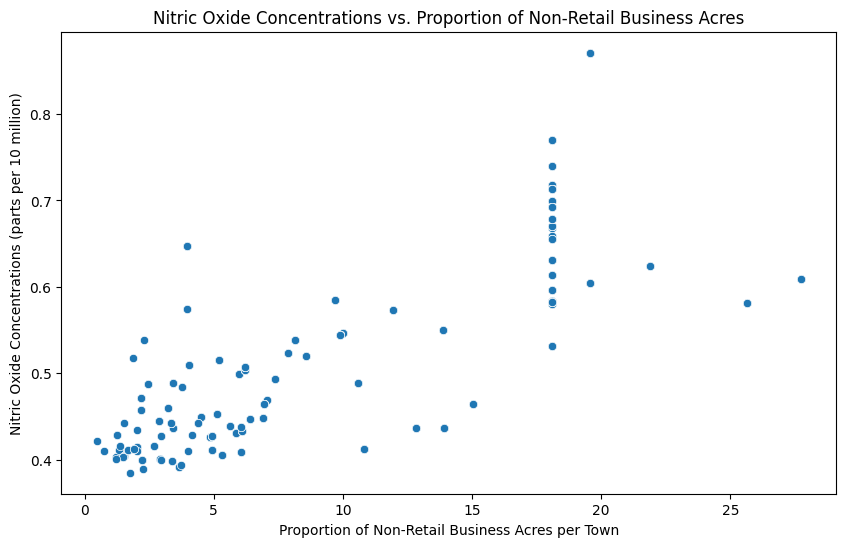

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming boston_df is already loaded as a pandas DataFrame

# Summary statistics
print(boston_df[['NOX', 'INDUS']].describe())

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.show()


Explanation of statistics:
- The summary statistics provide an overview of the central tendency and dispersion of both variables.
- The scatter plot visualizes the relationship between NOX and INDUS, allowing us to observe any potential patterns or trends.

In [14]:
from scipy import stats

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {correlation_coefficient:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence of a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")


Pearson correlation coefficient: 0.7637
p-value: 0.0000
Reject the null hypothesis. There is significant evidence of a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


Conclusion
1. Correlation coefficient: This value ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship.
2. p-value: If the p-value is less than the chosen significance level (α = 0.05), we reject the null hypothesis. This would indicate a statistically significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.
3. Interpretation:
    - If |correlation coefficient| > 0.5 and p-value < 0.05: Strong and significant correlation
    - If 0.3 < |correlation coefficient| < 0.5 and p-value < 0.05: Moderate and significant correlation
    - If |correlation coefficient| < 0.3 and p-value < 0.05: Weak but significant correlation
    - If p-value > 0.05: No significant evidence of correlation

### Task 3 of question 4
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Using Regression analysis)

Hypothesis
Null Hypothesis (𝐻0): There is no significant linear relationship between the weighted distance to employment centers (DIS) and the median value of owner-occupied homes (MEDV). (β = 0)

Alternative Hypothesis (H₁): There is a significant linear relationship between the weighted distance to employment centers (DIS) and the median value of owner-occupied homes (MEDV). (β ≠ 0)

              DIS        MEDV
count  506.000000  506.000000
mean     3.795043   22.532806
std      2.105710    9.197104
min      1.129600    5.000000
25%      2.100175   17.025000
50%      3.207450   21.200000
75%      5.188425   25.000000
max     12.126500   50.000000


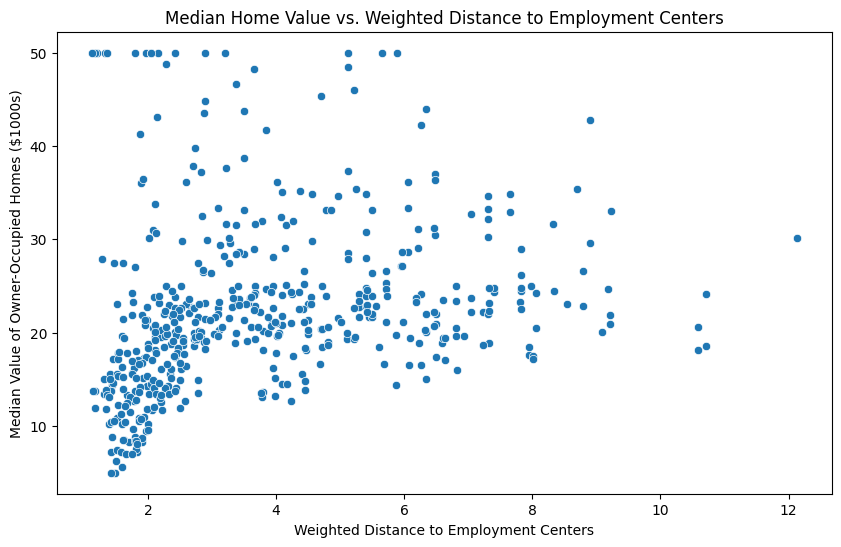

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Assuming boston_df is already loaded as a pandas DataFrame

# Summary statistics
print(boston_df[['DIS', 'MEDV']].describe())

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.title('Median Home Value vs. Weighted Distance to Employment Centers')
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()


Explanation of statistics:
- The summary statistics provide an overview of the central tendency and dispersion of both variables.
- The scatter plot visualizes the relationship between DIS and MEDV, allowing us to observe any potential patterns or trends.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = boston_df['DIS'].values.reshape(-1, 1)
y = boston_df['MEDV'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate statistics
slope = model.coef_[0]
intercept = model.intercept_
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Calculate p-value
n = len(X)
p = 1  # number of predictors
df = n - p - 1
t_stat = slope / (np.sqrt(mse) / np.sqrt(np.sum((X - X.mean())**2)))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"Regression equation: MEDV = {intercept:.2f} + {slope:.2f} * DIS")
print(f"R-squared: {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship between the weighted distance to employment centers and the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant linear relationship between the weighted distance to employment centers and the median value of owner-occupied homes.")

print(f"\nImpact: An increase of 1 unit in the weighted distance to employment centers is associated with a ${slope:.2f} thousand change in the median value of owner-occupied homes.")


Regression equation: MEDV = 18.39 + 1.09 * DIS
R-squared: 0.0625
p-value: 0.0000
Reject the null hypothesis. There is a significant linear relationship between the weighted distance to employment centers and the median value of owner-occupied homes.

Impact: An increase of 1 unit in the weighted distance to employment centers is associated with a $1.09 thousand change in the median value of owner-occupied homes.


Conclusion
1. Regression Equation: This shows the estimated linear relationship between DIS and MEDV.
2. R-squared: This value indicates the proportion of the variance in the dependent variable (MEDV) that is predictable from the independent variable (DIS).
3. p-value: If the p-value is less than the chosen significance level (α = 0.05), we reject the null hypothesis. This would indicate a statistically significant linear relationship between the weighted distance to employment centers and the median value of owner-occupied homes.
4. Interpretation:
    - If p-value < 0.05: There is strong evidence of a significant linear relationship between DIS and MEDV.
    - If p-value > 0.05: There is not enough evidence to conclude a significant linear relationship between DIS and MEDV.
5. Impact: The slope coefficient in the regression equation represents the change in the median value of owner-occupied homes for each unit increase in the weighted distance to employment centers.